* Total channels per file
* Min/Max/Avg of channels
* Total data points

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import h5py
import os

import pickle

In [2]:
file_list = os.listdir('competitionfiles/')
file_list

['COOLCAT_20100710_090236_48_20100710_090236_484.hdf',
 'COOLCAT_20101212_063501_01_20101212_063501_051.hdf',
 'COOLCAT_20100613_233707_51_20100613_233707_516.hdf',
 'COOLCAT_20101009_171337_54_20101009_171337_543.hdf',
 'COOLCAT_20110219_063826_58_20110219_063826_582.hdf',
 'COOLCAT_20110615_072718_93_20110615_072718_930.hdf',
 'COOLCAT_20110426_064910_33_20110426_064910_347.hdf',
 'COOLCAT_20100609_105544_87_20100609_105544_877.hdf',
 'COOLCAT_20100621_075732_43_20100621_075732_464.hdf',
 'COOLCAT_20100625_163846_48_20100625_163846_481.hdf',
 'COOLCAT_20100726_083404_25_20100726_083404_305.hdf',
 'COOLCAT_20101016_052123_49_20101016_052123_497.hdf',
 'COOLCAT_20100626_070129_93_20100626_070129_933.hdf',
 'COOLCAT_20101127_181519_77_20101127_181519_772.hdf',
 'COOLCAT_20100727_092557_45_20100727_092557_506.hdf',
 'COOLCAT_20100615_165516_48_20100615_165516_486.hdf',
 'COOLCAT_20100526_112459_44_20100526_112459_446.hdf',
 'COOLCAT_20110707_082220_42_20110707_082220_427.hdf',
 'COOLCAT_

In [3]:
def hdf_file_to_df(hdf_file_name):
    cwd = os.getcwd()
    f = h5py.File(hdf_file_name, 'r')
    dd_keys = list(f['DYNAMIC DATA'].keys())
    
    matrix = []
    
    for key in dd_keys:
        #print(list(f['DYNAMIC DATA'][key].attrs['SAMPLE RATE']))
        one_channel = np.array(f['DYNAMIC DATA'][key]['MEASURED'])
        matrix.append(one_channel)
    
    np_matrix = np.array(matrix)
    f.close()
    return pd.DataFrame(np_matrix.T, columns=dd_keys)

def find_file(year, month, day):
    file_list = os.listdir('competitionfiles/')
    return_list = []
    
    for filename in file_list:
        if (filename[8:12] == year and
            filename[12:14] == month and
            filename[14:16] == day):
            return_list.append(filename)
    
    return return_list

In [4]:
df_zero = hdf_file_to_df('competitionfiles/' + file_list[0])
df_zero

,ch_1,ch_10,ch_100,ch_101,ch_102,ch_103,ch_104,ch_105,ch_106,ch_107,...,ch_90,ch_91,ch_92,ch_93,ch_94,ch_95,ch_96,ch_97,ch_98,ch_99
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,92.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,92.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,92.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,80.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,80.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
9,3836.0,92.0,0.0,128.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,23.289080,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
file_list[0]

'COOLCAT_20100710_090236_48_20100710_090236_484.hdf'

In [6]:
 # This is for finding the sample rate - for file_list[0] aka 'COOLCAT_20100710_090236_48_20100710_090236_484.hdf'
 # we can see that it is 11.1111 for every single data point
 #
 # f = h5py.File(hdf_file_name, 'r')
 # dd_keys = list(f['DYNAMIC DATA'].keys())
 # 
 # matrix = []
 # 
 # for key in dd_keys:
 #     print(list(f['DYNAMIC DATA'][key].attrs['SAMPLE RATE']))
 #     one_channel = np.array(f['DYNAMIC DATA'][key]['MEASURED'])
 #     matrix.append(one_channel)

* 11.1111  = 40,000 data points per hour
* now let's get the min and max for all the channels

In [7]:
df_zero.describe()

,ch_1,ch_10,ch_100,ch_101,ch_102,ch_103,ch_104,ch_105,ch_106,ch_107,...,ch_90,ch_91,ch_92,ch_93,ch_94,ch_95,ch_96,ch_97,ch_98,ch_99
count,6936.000000,6936.000000,6936.000000,6936.000000,6.936000e+03,6936.0,6936.000000,6936.000000,6936.000000,6936.000000,...,6936.000000,6936.000000,6936.0,6936.000000,6936.000000,6936.000000,6936.00000,6936.000000,6936.000000,6936.000000
mean,3958.073241,78.884083,31.280277,127.833910,6.844098e+08,0.0,-6386.159170,349.617502,10.043497,127.723183,...,1780.096886,276.692042,0.0,23.158744,516.244521,24703.362168,5520.66436,2556.309112,108222.376009,7165.053057
std,151.184788,108.628938,178.023988,4.608144,2.966007e+07,0.0,297.325565,21.942076,0.469449,5.946511,...,517.562618,708.140971,0.0,1.788592,82.089934,4836.255767,17478.43945,97.141193,56794.170989,377.627499
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,-6400.000000,0.000000,0.000000,0.000000,...,-64.000000,-1792.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,3936.000000,32.000000,0.000000,128.000000,6.856750e+08,0.0,-6400.000000,336.951965,10.066163,128.000000,...,1408.000000,-320.000000,0.0,23.363298,512.000000,21488.000000,0.00000,2560.000000,89600.000000,7212.000000
50%,3988.000000,44.000000,0.000000,128.000000,6.856948e+08,0.0,-6400.000000,345.151947,10.079717,128.000000,...,1920.000000,224.000000,0.0,23.488298,512.000000,22228.000000,0.00000,2560.000000,89600.000000,7252.000000
75%,3996.000000,56.000000,0.000000,128.000000,6.857148e+08,0.0,-6400.000000,363.199951,10.093273,128.000000,...,2208.000000,576.000000,0.0,23.585955,512.000000,26088.000000,0.00000,2560.000000,89600.000000,7276.000000
max,4008.000000,440.000000,1152.000000,128.000000,6.857348e+08,0.0,0.000000,390.871948,10.114916,128.000000,...,2688.000000,2112.000000,0.0,26.882832,1792.000000,38180.000000,198400.00000,2560.000000,281600.000000,7292.000000


In [9]:
hdf_file_to_df('competitionfiles/' + file_list[2]).describe()

,ch_1,ch_10,ch_100,ch_101,ch_102,ch_103,ch_104,ch_105,ch_106,ch_107,...,ch_90,ch_91,ch_92,ch_93,ch_94,ch_95,ch_96,ch_97,ch_98,ch_99
count,17184.000000,17184.000000,17184.000000,17184.000000,1.718400e+04,17184.000000,17184.000000,17184.000000,17184.000000,17184.000000,...,17184.000000,17184.000000,17184.0,17184.000000,17184.000000,17184.000000,17184.000000,17184.000000,17184.000000,17184.000000
mean,3111.349162,257.644786,414.487896,127.940410,6.289612e+08,20.260708,-6394.785847,423.320242,25.759645,107.635009,...,1078.484171,2264.733706,0.0,18.068997,691.195531,42943.391294,84564.851024,1109.631285,206751.648045,9718.553073
std,107.327190,168.248043,498.749665,2.761241,1.662720e+07,46.722600,182.607038,30.161301,0.851453,46.820012,...,1567.848603,7424.130585,0.0,4.767473,664.045107,11815.603066,76010.964981,1514.262446,86141.039170,469.378022
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,-6400.000000,0.000000,0.000000,0.000000,...,-2688.000000,-1728.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3064.000000,72.000000,0.000000,128.000000,6.293513e+08,0.000000,-6400.000000,412.687958,25.395695,128.000000,...,224.000000,-32.000000,0.0,13.496103,512.000000,30104.000000,0.000000,0.000000,104784.000000,9560.000000
50%,3088.000000,328.000000,0.000000,128.000000,6.294006e+08,0.000000,-6400.000000,433.439941,25.913818,128.000000,...,928.000000,928.000000,0.0,18.236341,512.000000,45978.000000,76736.000000,0.000000,281600.000000,9816.000000
75%,3140.000000,420.000000,896.000000,128.000000,6.294501e+08,0.000000,-6400.000000,440.503937,26.158791,128.000000,...,2304.000000,2656.000000,0.0,22.515640,512.000000,54000.000000,157920.000000,2560.000000,281600.000000,9944.000000
max,3420.000000,648.000000,1152.000000,128.000000,6.294996e+08,128.000000,0.000000,448.087952,26.262527,128.000000,...,4128.000000,99296.000000,0.0,27.425800,3200.000000,60068.000000,198400.000000,5248.000000,281600.000000,10516.000000


In [25]:
def get_mins_and_max(df):
    # This represents 90 seconds of measurement time
    first_90_secs_df = df.head(1000)
    
    # Get min, std deviation, min, and max
    describe_df = first_90_secs_df.describe().loc[['mean', 'std', 'min', 'max']]
    
    # The upper bound = mean + 2sigma, lower bound = mean - 2sigma
    describe_df.loc['upper_bound'] = describe_df.loc['mean'] + (2 * describe_df.loc['std'])
    describe_df.loc['lower_bound'] = describe_df.loc['mean'] - (2 * describe_df.loc['std'])
    
    return describe_df

In [27]:
get_mins_and_max(df_zero)

,ch_1,ch_10,ch_100,ch_101,ch_102,ch_103,ch_104,ch_105,ch_106,ch_107,...,ch_90,ch_91,ch_92,ch_93,ch_94,ch_95,ch_96,ch_97,ch_98,ch_99
mean,3836.700000,68.620000,31.488000,126.848000,6.767472e+08,0.0,-6304.00000,372.240328,9.827303,126.0800,...,1545.504000,1575.328000,0.0,22.795942,524.800000,21909.760000,5449.312000,2534.400000,102412.800000,6998.536000
std,366.296890,71.464472,182.978564,12.094427,7.770641e+07,0.0,778.32499,43.885450,1.213333,15.5665,...,356.559483,392.433985,0.0,3.278192,159.438454,2539.257408,19638.697666,254.844238,47678.709457,870.688327
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,-6400.00000,0.000000,0.000000,0.0000,...,0.000000,-384.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3896.000000,416.000000,1152.000000,128.000000,6.856664e+08,0.0,0.00000,390.871948,9.986865,128.0000,...,2016.000000,2112.000000,0.0,26.859394,1792.000000,28280.000000,198400.000000,2560.000000,281600.000000,7168.000000
upper_bound,4569.293779,211.548944,397.445129,151.036855,8.321600e+08,0.0,-4747.35002,460.011228,12.253970,157.2130,...,2258.622965,2360.195971,0.0,29.352326,843.676908,26988.274817,44726.707331,3044.088476,197770.218914,8739.912654
lower_bound,3104.106221,-74.308944,-334.469129,102.659145,5.213344e+08,0.0,-7860.64998,284.469428,7.400636,94.9470,...,832.385035,790.460029,0.0,16.239559,205.923092,16831.245183,-33828.083331,2024.711524,7055.381086,5257.159346


In [86]:
def make_ten_graphs(df):
    describe_df = get_mins_and_max(df)
    
    for channel in df.iloc[22:].columns[50:60]:
        upper_bound = describe_df[channel]['upper_bound']
        lower_bound = describe_df[channel]['lower_bound']
        
        s = 1.5
        plt.figure(figsize=(16/s, 9/s))
        
        fig = sns.lineplot(df.iloc[22:].index, df.iloc[22:][channel])
        #sns.lineplot(df.iloc[22:].index, upper_bound, color='#fc4f30')
        #sns.lineplot(df.iloc[22:].index, lower_bound, color='#fc4f30')
        
        plt.xlabel('Time in ticks (11.1 Hz)')

In [87]:
sns.set()
plt.style.use('fivethirtyeight')

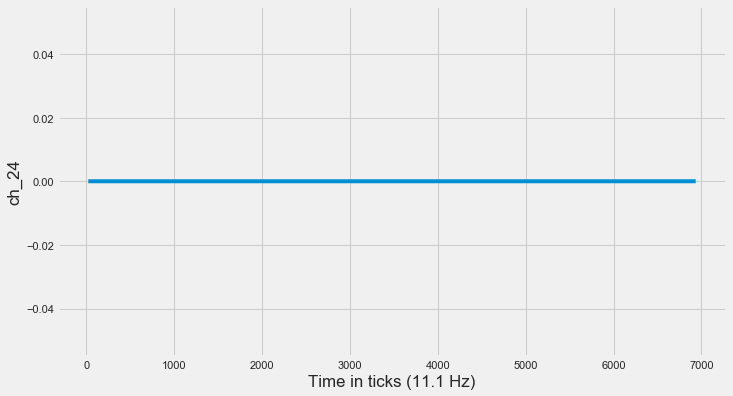

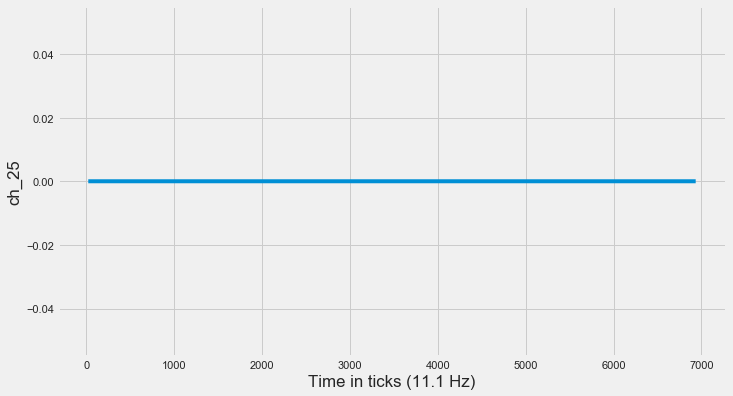

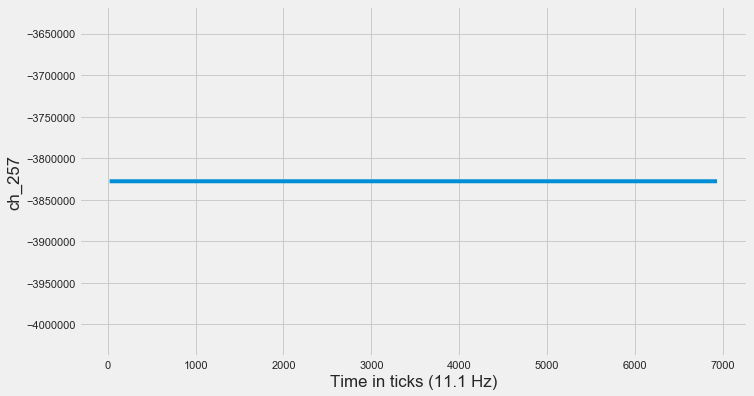

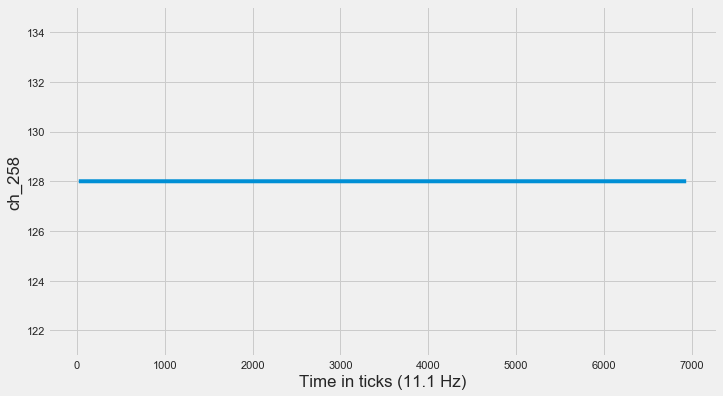

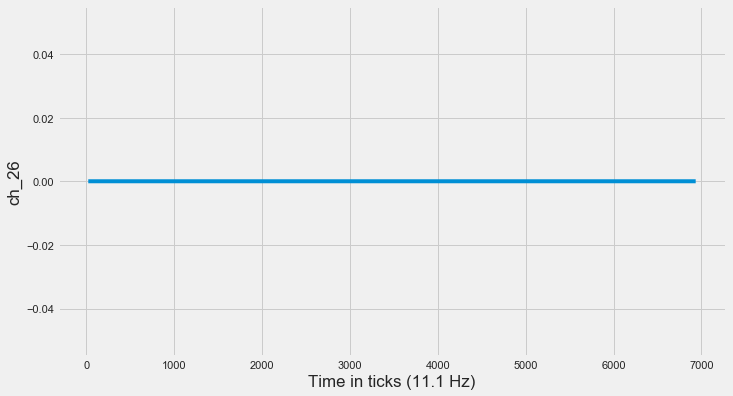

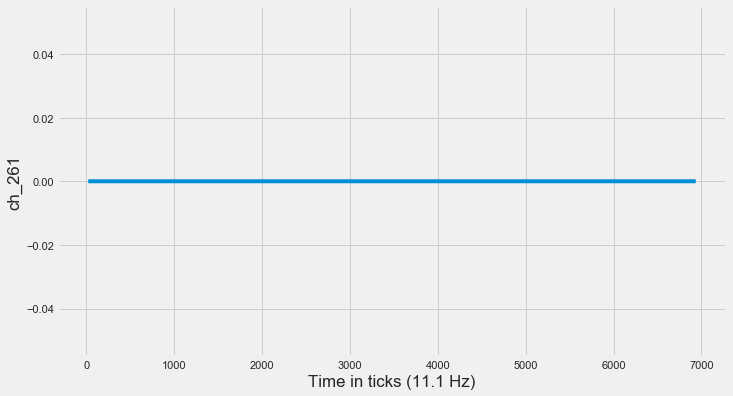

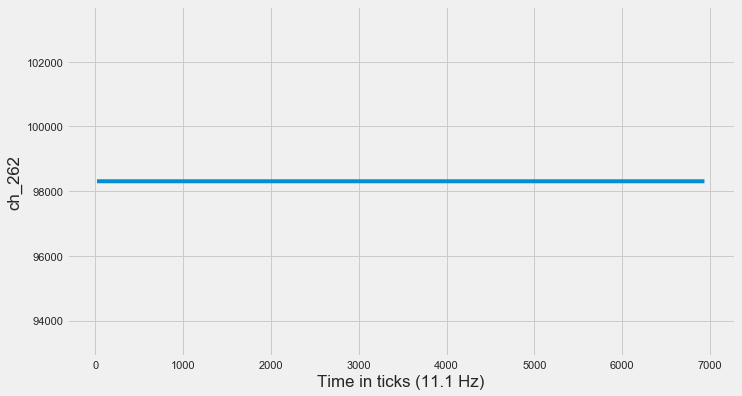

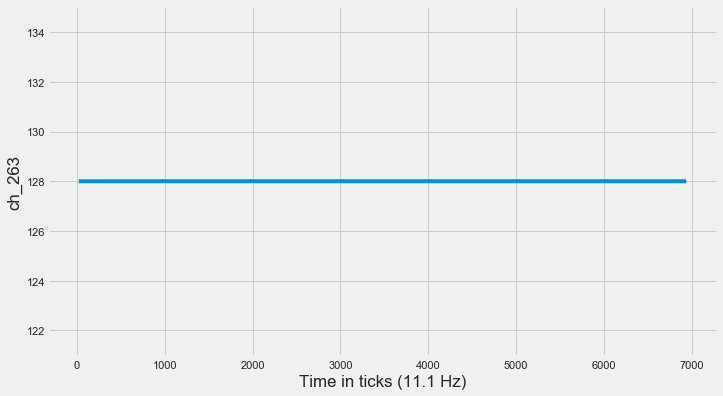

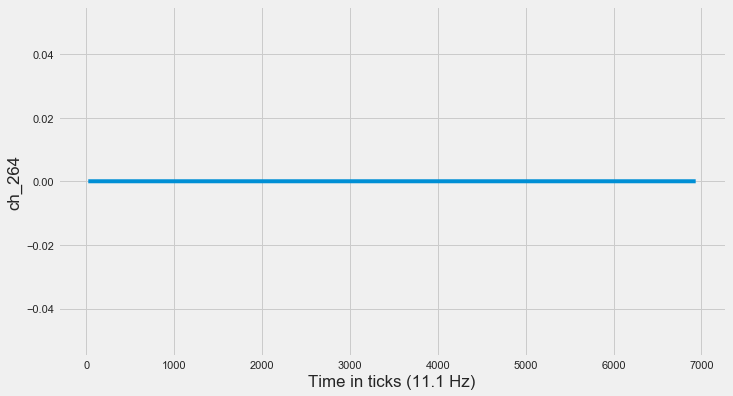

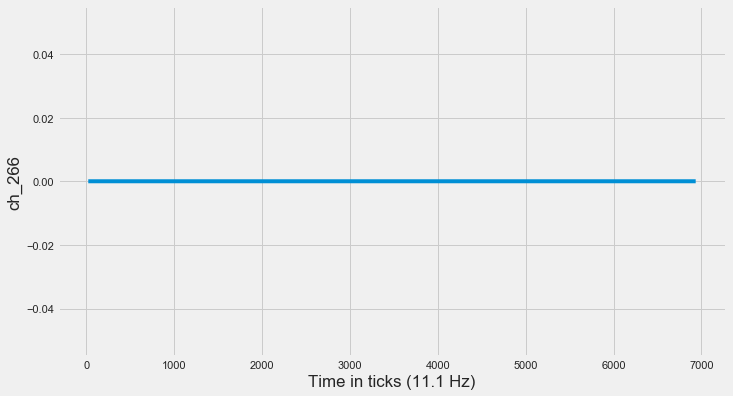

In [88]:
make_ten_graphs(df_zero)

### We can see that most graphs flatline, so let's pick a random file and see what % of channels are completely flat for the entire day

In [100]:
np.random.randint(884)

606

In [101]:
def get_file_x(x):
    return hdf_file_to_df('competitionfiles/' + file_list[x])

In [108]:
get_file_x(606)

,ch_1,ch_10,ch_100,ch_101,ch_102,ch_103,ch_104,ch_105,ch_106,ch_107,...,ch_90,ch_91,ch_92,ch_93,ch_94,ch_95,ch_96,ch_97,ch_98,ch_99
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
5,4060.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
6,4060.0,0.0,1024.0,128.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,4256.0,3968.0,0.0,27.4258,384.0,57448.0,0.0,2560.0,89600.0,0.0
7,4064.0,0.0,1024.0,128.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,4256.0,3968.0,0.0,27.4258,384.0,57448.0,0.0,2560.0,89600.0,0.0
8,4064.0,0.0,1024.0,128.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,4256.0,3968.0,0.0,27.4258,384.0,57316.0,0.0,2560.0,89600.0,0.0
9,4068.0,4.0,1024.0,128.0,608478208.0,0.0,0.0,0.0,0.000000,0.0,...,4256.0,3968.0,0.0,27.4258,384.0,57316.0,0.0,2560.0,89600.0,0.0


### Now that we have the file, let's take out rows 0-21 and check to see if all values of a row are equal

In [117]:
df_zero['ch_9'].nunique()

3

In [124]:
def get_percent_flatline(df):
    cut_df = df.iloc[22:]
    nunique_list = []
    
    for channel in cut_df.columns:
        number_of_unique_measurements = cut_df[channel].nunique()
        nunique_list.append(number_of_unique_measurements)
     
    count = 0
    for i in nunique_list:
        if i == 1:
            count += 1
            
    percent_flatline = 100 * count / len(nunique_list)
    
    print(str(percent_flatline) + '% of the values are complete flatlines!')
    #return nunique_list
    return percent_flatline

In [126]:
percent_flatline_list = []

for i in range(100):
    df_i = get_file_x(np.random.randint(884))
    percent_flatline_list.append(get_percent_flatline(df_i))

38.81578947368421% of the values are complete flatlines!
34.166666666666664% of the values are complete flatlines!
36.666666666666664% of the values are complete flatlines!
75.59808612440192% of the values are complete flatlines!
45.39473684210526% of the values are complete flatlines!
64.16666666666667% of the values are complete flatlines!
31.972789115646258% of the values are complete flatlines!
40.67796610169491% of the values are complete flatlines!
75.0% of the values are complete flatlines!
53.94736842105263% of the values are complete flatlines!
46.05263157894737% of the values are complete flatlines!
33.333333333333336% of the values are complete flatlines!
46.666666666666664% of the values are complete flatlines!
40.833333333333336% of the values are complete flatlines!
29.577464788732396% of the values are complete flatlines!
88.65546218487395% of the values are complete flatlines!
0.0% of the values are complete flatlines!
71.77033492822966% of the values are complete flatl

In [128]:
np.mean(percent_flatline_list)

46.447768093852304

### After sampling 100 random files, we can see that on average, 46.4% of all channels in a file completely stay at one value (ignoring the first 2 seconds)